<h2>Scikit learn - Titanic dataset - Gilles Witters

In this notebook I will explain how I used Scikit learn to create a prediction on the titanic dataset.

First let's import the correct libraries.

In [2]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

Now let's read our cleaned csv file

In [3]:
# Load the Titanic dataset.
titanic_df = pd.read_csv('../../4. Other/4.1 Datasets/Titanic/Titanic cleaned.csv')

Let's print the first lines to check whether it is loaded correctly.

In [4]:
titanic_df.head(5)

,Unnamed: 0,passenger_class,survived,name,sex,age,number_of_siblings,number_of_parents,ticket,fare,cabin,embarked,boat,body,destination
0,0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",1,1.0,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,2,1,0,"Allison, Miss. Helen Loraine",0,2.0,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"


Now we need to split the data into a training and test set.

In [5]:
# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    titanic_df[['passenger_class', 'sex', 'age', 'fare', 'body']],
    titanic_df['survived'],  # Removed double brackets to make y_train and y_test 1D arrays
    test_size=0.2,
    random_state=0)

Next we will train or model. I did choose for the boosting method because it works pretty well with nan values out of the box.

In [6]:
# Model
clf = HistGradientBoostingClassifier(max_depth=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)

Let's do a prediction now.

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[147  15]
 [ 30  70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       162
           1       0.82      0.70      0.76       100

    accuracy                           0.83       262
   macro avg       0.83      0.80      0.81       262
weighted avg       0.83      0.83      0.83       262

Accuracy Score: 0.8282442748091603


Let's also visualize it

In [ ]:
%pip install seaborn

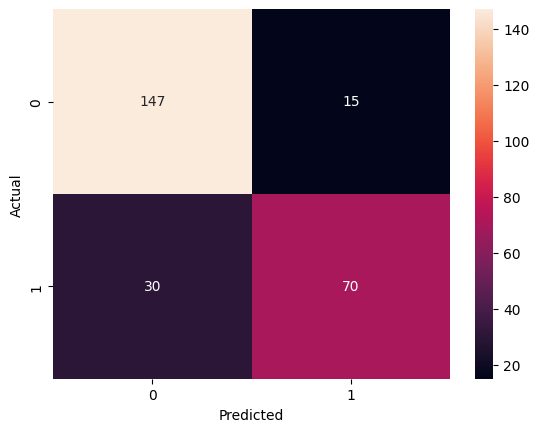

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
